In [ ]:
!pip install simpletransformers

In [ ]:
import pandas as pd
import torch
import time
from simpletransformers.classification import ClassificationModel, ClassificationArgs

train_df = pd.read_csv("/content/drive/MyDrive/ticket_suggestion_spanish/technology_train_spanish.csv")


In [ ]:
train_df.head()

,labels,spanish_text
0,ticket_no,Buenos dias
1,ticket_yes,¿Me pueden ayudar con mi teléfono? No se encie...
2,ticket_no,Informar sobre mi tarjeta perdida.
3,ticket_no,Este teléfono es un regalo para tu cumpleaños.
4,ticket_no,¿Puedes decirme qué es un septuagenario?


In [ ]:
labels= train_df["labels"]
spanish_text = train_df["spanish_text"]
output=[]
for l,s in zip(labels,spanish_text):
  output.append([s,l])

df = pd.DataFrame(output,index=None)


In [ ]:
df.head()

,0,1
0,Buenos dias,ticket_no
1,¿Me pueden ayudar con mi teléfono? No se encie...,ticket_yes
2,Informar sobre mi tarjeta perdida.,ticket_no
3,Este teléfono es un regalo para tu cumpleaños.,ticket_no
4,¿Puedes decirme qué es un septuagenario?,ticket_no


In [ ]:
df.columns = ['spanish_text','labels']

In [ ]:
df.head()

,spanish_text,labels
0,Buenos dias,ticket_no
1,¿Me pueden ayudar con mi teléfono? No se encie...,ticket_yes
2,Informar sobre mi tarjeta perdida.,ticket_no
3,Este teléfono es un regalo para tu cumpleaños.,ticket_no
4,¿Puedes decirme qué es un septuagenario?,ticket_no


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
traindf,validdf = train_test_split(df,stratify=df['labels'],test_size=0.2,random_state = 42)

In [ ]:
traindf.reset_index(drop=True,inplace=True)

In [ ]:
traindf.head()

,spanish_text,labels
0,"Ayúdame, mi computadora portátil está dañada d...",ticket_yes
1,¿Qué es el período de gracia?,ticket_no
2,Podría llover hoy.,ticket_no
3,Quiero saber el significado de mordaz.,ticket_no
4,¿Recibo alguna notificación en caso de que suf...,ticket_yes


In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


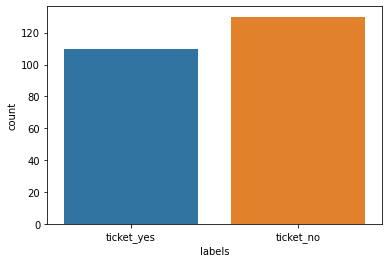

In [ ]:
sns.countplot(traindf.labels)

In [ ]:
validdf.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


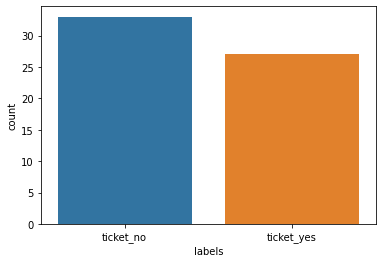

In [ ]:
sns.countplot(validdf.labels)

In [ ]:
model_save_path = "/content/drive/MyDrive/ticket_suggestion_spanish/models"

model_args = ClassificationArgs(
        do_lower_case=True,
        num_train_epochs=4,
        output_dir=model_save_path,
        best_model_dir=model_save_path + "/best_model",
        train_batch_size=4,
        eval_batch_size=8,
        evaluate_during_training=True,
        evaluate_during_training_steps=40,
        save_model_every_epoch=False,
        save_eval_checkpoints=False,
        save_steps=-1,
        overwrite_output_dir=True,
        manual_seed=42,
        fp16=False,
        use_multiprocessing=False,
        labels_list=["ticket_no", "ticket_yes"]
    )

model = ClassificationModel('bert', "dccuchile/bert-base-spanish-wwm-uncased", num_labels=2,
                                use_cuda=torch.cuda.is_available(), args=model_args)
start_time = time.time()
model.train_model(traindf, eval_df=validdf)
print("time taken to load the model is %s", str(time.time()-start_time))

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchi

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/60 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/60 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/60 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/60 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/60 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/60 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/60 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/60 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/60 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/60 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/60 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/60 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/60 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/60 [00:00<?, ?it/s]

time taken to load the model is %s 1478.1304531097412


In [ ]:
import torch
import csv
import numpy as np
from scipy.special import softmax
from simpletransformers.classification import ClassificationModel
import pandas as pd

trained_model_path = "/content/drive/MyDrive/ticket_suggestion_spanish/models"


model = ClassificationModel('bert', trained_model_path, use_cuda=torch.cuda.is_available())

eval_df = pd.read_csv("/content/drive/MyDrive/ticket_suggestion_spanish/testcases_ticketsuggestion _tech_spanish_reduced.csv")
texts = eval_df["spanish_text"]
labels = eval_df["actual_labels"]
prediction_list = []
confidence_list = []
for text in texts:
    predictions, raw_outputs = model.predict([text.lower()])
    result = predictions[0]
    prediction_list.append(result)
    probability_list = np.array([softmax(element)for element in raw_outputs])
    probability = np.max(probability_list)
    confidence_list.append(probability)
    print(text, result, probability)
outputs = []
for text,label, prediction, confidence in zip(texts, labels, prediction_list, confidence_list):
  outputs.append([text, label, prediction,confidence])
with open("/content/drive/MyDrive/ticket_suggestion_spanish/results/results.csv", 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

La pantalla de mi computadora portátil no se enciende. ticket_yes 0.99980043395829


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

No puedo abrir ninguna página en Chrome ticket_yes 0.9995921418787304


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

mi correo electrónico no funciona ticket_yes 0.9993491029988203


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Hola cómo estás hoy ticket_no 0.9997776742888208


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

No me siento tan bien hoy ticket_no 0.9997516087982005


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Probé negativo para COVID-19 ticket_no 0.9997351954570818


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

el televisor no recibe entrada del cable hdmi. ticket_yes 0.9997871675570478


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

no recibe información de la televisión. ticket_yes 0.9993648076964319


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

la tv no recibe entrada ticket_yes 0.999651759550124


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Estoy pensando en ir al kfc ticket_no 0.9997339760670185


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

La oficina permanecerá cerrada el martes debido a un día festivo. ticket_no 0.9997017763136986


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Me encantan todas las decoraciones artísticas de tu oficina. ticket_no 0.999718377171073


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

No sé si necesito un controlador para el micrófono de mi computadora portátil. ticket_yes 0.9998010306959271


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

dejé caer mi teléfono. ticket_yes 0.9994509961585266


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

mi teléfono estaba en el agua. ticket_yes 0.9989522928281729


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

No pude configurar las configuraciones en mi computadora portátil. ticket_yes 0.9997870376932189


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

hay una impresora que no funciona correctamente. ticket_yes 0.9997861888675227


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Parece que va a llover hoy ticket_no 0.9997437295175382


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿porque el cielo es azul? ticket_no 0.9997282289454875


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

mi enrutador y módem no funcionan. ticket_yes 0.9998042297505315


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

mi batería se está cargando lentamente. ticket_yes 0.9997336211251681


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

el gato está durmiendo en la silla. ticket_no 0.9996660306344715


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

no puedo acceder a internet. ticket_yes 0.9996164597457955


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Estoy usando Windows 7 y he actualizado mis controladores. Estoy en el proceso de instalar los controladores adecuados para mi computadora portátil y su hardware. ticket_yes 0.9997888530286996


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Puedo descargar la última actualización de firmware del sitio web de Linksys? ticket_yes 0.9997490514511242


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

mi computadora no se enciende. ticket_yes 0.9996962820336871


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

mi enrutador no tiene conexión a Internet. ticket_yes 0.9998023900295823


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Tengo una llanta pinchada ticket_no 0.9985787519832559


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿puedo comer una hamburguesa? ticket_no 0.9997712596977564


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

donde estais chicos ticket_no 0.9997573251703205


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Estoy usando Windows 98, ¿cómo puedo actualizar a XP? ticket_yes 0.9997875893843987


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Mi computadora funciona lento, creo que tengo un virus ticket_yes 0.9997590976638239


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cómo sé si me estoy quedando sin RAM? ticket_yes 0.9992403028040966


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿quien descubrio America? ticket_no 0.9996908730992572


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Por qué mi Internet funciona lento? ticket_yes 0.9996310177462993


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

como hago una pizza ticket_no 0.999771289520147


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cómo puedo arreglar mi teclado? ticket_yes 0.999454358648118


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

oye, ¿por qué no funciona mi cámara web? ticket_yes 0.9997738365764296


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cómo configuro VPN en mi sistema? ticket_yes 0.9997892046481366


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Puedes sugerirme un buen libro de no ficción? ticket_no 0.9997268900083424


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cuál es la cantidad mínima de pedido para el servicio de entrega? ticket_no 0.9997475678997437


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Tienes tu propia cocina? ticket_no 0.9997749415447063


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Dónde entregas todo? ticket_no 0.9997618471167902


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cuál es la cantidad mínima de pedido? ticket_no 0.9997786406100563


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cuánto tiempo se tarda en llegar la comida? ticket_no 0.9997719304960625


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cuándo se realiza el cargo en mi tarjeta de crédito? ticket_no 0.9997039691621816


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cómo se calcula el impuesto sobre las ventas? ticket_no 0.9997200023989713


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cómo obtengo una copia de mi factura / orden de compra? ticket_no 0.9976589116165882


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Los precios y las promociones son los mismos en línea que en las tiendas? ticket_no 0.9992860157008914


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cuáles son sus opciones de envío? ticket_no 0.8595773880749591


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cuál es su política de reembolso? ticket_no 0.9995463443557017


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Bloqueo específico de dispositivo disponible? ticket_yes 0.9989935970483903


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Bloqueé una categoría usando ViaSecure, pero no se bloqueó un sitio web que debería haber sido bloqueado. ¿Dónde puedo informar de esto? ticket_yes 0.9997729086232389


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Qué es un televisor inteligente? ticket_yes 0.9995708689673137


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cuánto tiempo puede durar un cable HDMI y seguir funcionando? ticket_yes 0.9997919577344898


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Hay alguna diferencia en los cables HDMI? ticket_yes 0.999770904583752


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Cuánto tiempo puede tener el cable HDMI 4K? ticket_yes 0.9997750145451288


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿HDMI necesita blindaje? ticket_yes 0.9994285977200036


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

¿Qué es un enrutador ONU? ticket_yes 0.9997890401257651


In [ ]:
result = pd.read_csv("/content/drive/MyDrive/ticket_suggestion_spanish/results/results.csv",header=None)

In [ ]:
result.columns = ['spanish_text','actual','predicted','confidence_score']

In [ ]:
result

,spanish_text,actual,predicted,confidence_score
0,La pantalla de mi computadora portátil no se e...,ticket_yes,ticket_yes,0.999800
1,No puedo abrir ninguna página en Chrome,ticket_yes,ticket_yes,0.999592
2,mi correo electrónico no funciona,ticket_yes,ticket_yes,0.999349
3,Hola cómo estás hoy,ticket_no,ticket_no,0.999778
4,No me siento tan bien hoy,ticket_no,ticket_no,0.999752
5,Probé negativo para COVID-19,ticket_no,ticket_no,0.999735
6,el televisor no recibe entrada del cable hdmi.,ticket_yes,ticket_yes,0.999787
7,no recibe información de la televisión.,ticket_yes,ticket_yes,0.999365
8,la tv no recibe entrada,ticket_yes,ticket_yes,0.999652
9,Estoy pensando en ir al kfc,ticket_no,ticket_no,0.999734


In [ ]:
result[result['actual']!=result['predicted']]

,spanish_text,actual,predicted,confidence_score
